In [2]:
using Plots, DelimitedFiles

In [3]:
Plots.default(
#    grid = false,
    size = (400,400),
    fontfamily="serif-roman", 
    titlefontsize =12 ,   
    markerstrokewidth = 1,        # border around dots
#    markersize = 3
)

# 1. epsilon-coupling 

In [3]:
path = "../data_epsilon_coupling/"

"../data_epsilon_coupling/"

In [4]:
#data obtained with damping 0.9 -> pb of convergence for epsilon larger than 0.5
namefile = path * "run_epsilon_PF00397_sce_100b_betafixed.txt"
data_epsilon = readdlm(namefile);
param_epsilon = data_epsilon[1,:]

neps = sum(typeof.(data_epsilon[2,:]) .== Float64)
res_epsilon = data_epsilon[2:end,1:neps];

epsilons = res_epsilon[1,:]
μΔEs = res_epsilon[2,:]
σΔEs = res_epsilon[3,:]
μdist = res_epsilon[6,:]
σdist = res_epsilon[7,:];
μE = res_epsilon[8,:]
σE = res_epsilon[9,:]
μU = res_epsilon[10,:]
σU = res_epsilon[11,:]
μS = res_epsilon[12,:]
σS = res_epsilon[13,:];
μpolars = res_epsilon[14,:]
σpolars = res_epsilon[15,:];


In [5]:
#data obtained with a smaller damping -> help for convergence
namefile = path * "run_epsilon_PF00397_sce_100b_betafixed_damp0p5.txt"
data_epsilon = readdlm(namefile);
param_epsilon = data_epsilon[1,:]

neps = sum(typeof.(data_epsilon[2,:]) .== Float64)
res_epsilon = data_epsilon[2:end,1:neps];

epsilons_d = res_epsilon[1,:]
μΔEs_d = res_epsilon[2,:]
σΔEs_d = res_epsilon[3,:]
μdist_d = res_epsilon[6,:]
σdist_d = res_epsilon[7,:];
μE_d = res_epsilon[8,:]
σE_d = res_epsilon[9,:]
μU_d = res_epsilon[10,:]
σU_d = res_epsilon[11,:]
μS_d = res_epsilon[12,:]
σS_d = res_epsilon[13,:];
μpolars_d = res_epsilon[14,:]
σpolars_d = res_epsilon[15,:];


In [6]:
L=31

31

In [16]:
pΔ = scatter(-epsilons[1:5], μΔEs[1:5]./L,  yerr=σΔEs[1:5]./L, label="", legend=:topleft, color="red")
scatter!(-epsilons_d, μΔEs_d./L,  yerr=σΔEs_d./L, legend=:topleft, color="red", label="")

xlabel!("\$ \\epsilon\$")
ylabel!("\$ \\Delta e_{\\min}\$")
hline!([0.0], label="", color="black")

pdist = scatter(-epsilons[1:5], μdist[1:5], yerr=σdist, label="", legend=:topleft, color="red")
scatter!(-epsilons_d, μdist_d, yerr=σdist_d, legend=:topleft, color="red", label="")

hline!([0.0], label="", color="black")
xlabel!("\$ \\epsilon\$")
ylabel!("Hamming distance")

pu = scatter(-epsilons[1:5], μE[1:5]./L, yerr=σE[1:5]./L, label="ground state", legend=:topleft, color = "blue")
scatter!(-epsilons_d, μE_d./L, yerr=σE_d./L, color="blue", label="")
scatter!(-epsilons[1:5], μU[1:5]./L, yerr=σU[1:5]./L, label="average", color = "orange")
scatter!(-epsilons_d, μU_d./L, yerr=σU_d./L, color="orange", label="")

xlabel!("\$ \\epsilon\$")
ylabel!("energy density")
ps = scatter(-epsilons[1:5], μS[1:5]./L, yerr=σS[1:5]./L, legend=:topleft, color = "red", label="")
scatter!(-epsilons_d, μS_d./L, yerr=σS_d./L, color="red", label="")
#scatter!(-epsilons, μpolars, yerr=σpolars, legend=:topleft, color = "black", label="")

xlabel!("\$ \\epsilon\$")
ylabel!("entropy density")
hline!([0.0], label="", color="black", legend=:bottomright);

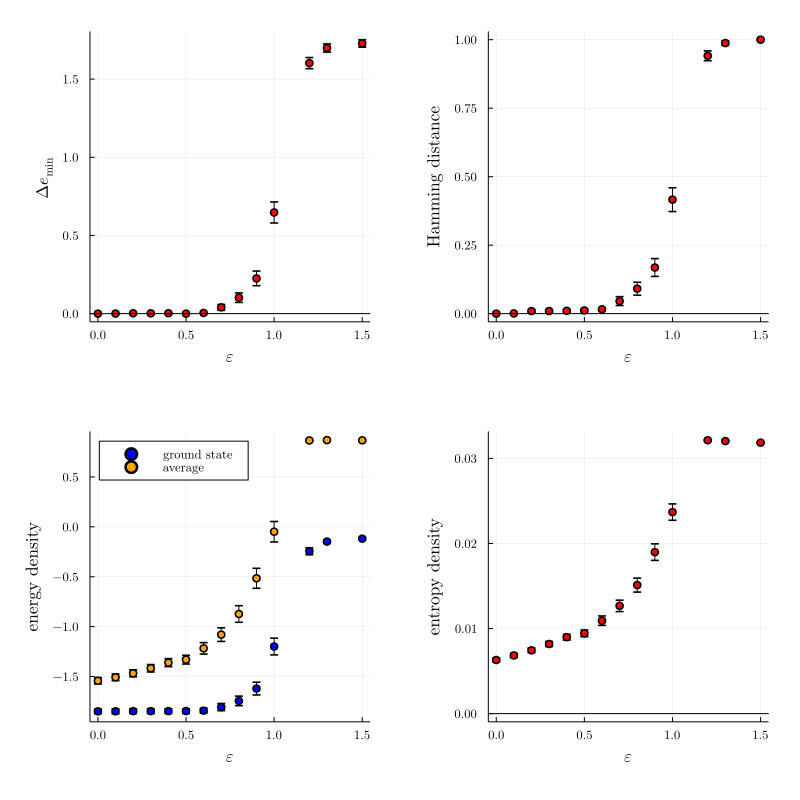

In [17]:
plot(pΔ, pdist, pu, ps, size=(800,800), margin=6*Plots.mm)

In [18]:
savefig("epsilon_PF00397.pdf")

# 2. Sequence-based metrics: comparison between hmmer and SCE:

# 2.1 On PF00397

In [3]:
namefile = "data_compareMSA_PF00397_hmmerSCE.txt"
data_seqs = readdlm(namefile);

diffE = data_seqs[1,:];
Hdist = data_seqs[2,:]
Gp = data_seqs[3,:]
Gm = data_seqs[4,:]
Mism = data_seqs[5,:];

p1 = plot(sort(diffE,rev=true), title="E(hmmer)-E(SCE)", label="")
p2 = histogram(Hdist, bins = 50, normed = true, title = "Hamming Distance", label="")
p3 = histogram(Gp, bins = 50, normed = true, title = "Gap +", label="")
p4 = histogram(Gm, bins = 50, normed = true, title = "Gap -", label="")
p5 = histogram(Mism, bins = 50, normed = true, title = "Mismatch", label="");

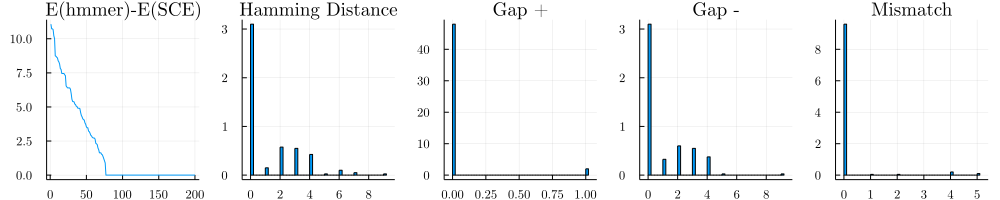

In [5]:
plot(p1, p2, p3, p4, p5, size = (1000, 200), layout = (1,5))

# 2.2 On PF00684

In [8]:
namefile = "data_compareMSA_PF00684_hmmerMF.txt"
data_seqs = readdlm(namefile);

diffE = data_seqs[1,:];
Hdist = data_seqs[2,:]
Gp = data_seqs[3,:]
Gm = data_seqs[4,:]
Mism = data_seqs[5,:];

p6 = plot(sort(diffE,rev=true), title="E(hmmer)-E(SCE)", label="")
p7 = histogram(Hdist, bins = 50, normed = true, title = "Hamming Distance", label="")
p8 = histogram(Gp, bins = 50, normed = true, title = "Gap +", label="")
p9 = histogram(Gm, bins = 50, normed = true, title = "Gap -", label="")
p10 = histogram(Mism, bins = 50, normed = true, title = "Mismatch", label="");

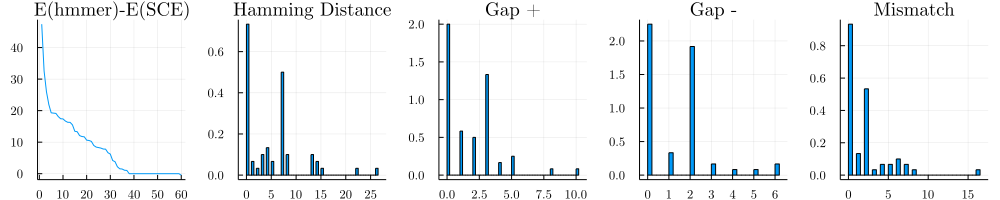

In [9]:
plot(p6, p7, p8, p9, p10, size = (1000, 200), layout = (1,5))

In [27]:
namefile = "data_compareMSA_PF00684_hmmerSCE.txt"
data_seqs = readdlm(namefile);

diffE = data_seqs[1,:];
Hdist = data_seqs[2,:]
Gp = data_seqs[3,:]
Gm = data_seqs[4,:]
Mism = data_seqs[5,:];

p6 = plot(sort(diffE,rev=true), title="E(hmmer)-E(SCE)", label="")
p7 = histogram(Hdist, bins = 50, normed = true, title = "Hamming Distance", label="")
p8 = histogram(Gp, bins = 50, normed = true, title = "Gap +", label="")
p9 = histogram(Gm, bins = 50, normed = true, title = "Gap -", label="")
p10 = histogram(Mism, bins = 50, normed = true, title = "Mismatch", label="");

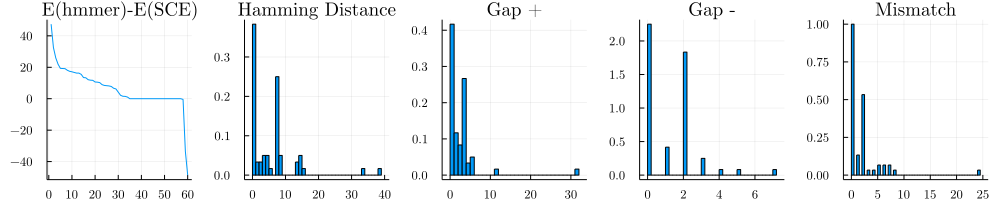

In [28]:
plot(p6, p7, p8, p9, p10, size = (1000, 200), layout = (1,5))

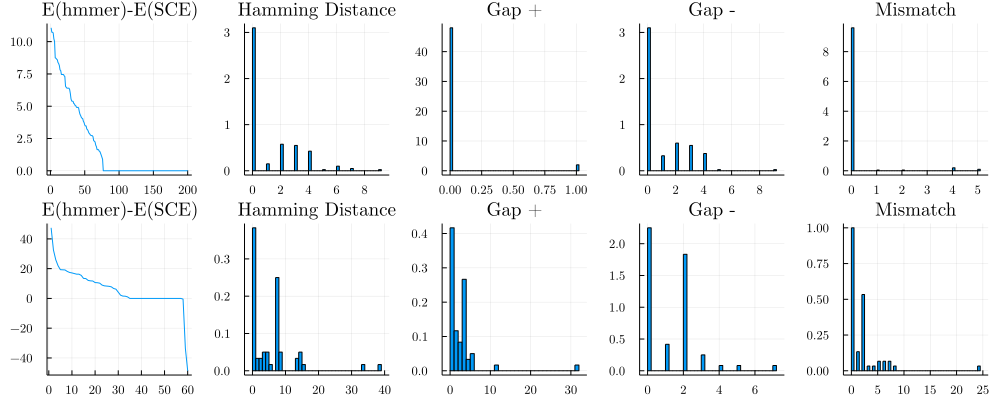

In [29]:
p = plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, size = (1000, 400), layout = (2,5))

In [30]:
savefig("seqs_hmmerSCE.pdf")

# 3. Seq-based metrics: comparison of decoding methods:

In [42]:
namefile = "data_compareMSA_decodings.txt"
data_seqs = readdlm(namefile);

diffE_PF00397_mf = data_seqs[1,1:200];
diffE_PF00397_sce = data_seqs[2,1:200]
diffE_PF00684_mf = data_seqs[3,1:60]
diffE_PF00684_sce = data_seqs[4,1:60];

p1 = plot(sort(diffE_PF00397_mf,rev=true), title="PF00397 (mf)", label="")
p2 = plot(sort(diffE_PF00397_sce,rev=true), title="PF0397 (sce)", label="")
p3 = plot(sort(diffE_PF00684_mf,rev=true), title="PF00684 (mf)", label="")
p4 = plot(sort(diffE_PF00684_sce,rev=true), title="PF00684 (sce)", label="");


In [50]:
findmax(diffE_PF00684_sce), findmin(diffE_PF00684_sce)

((212.27101, 36), (-48.134937, 48))

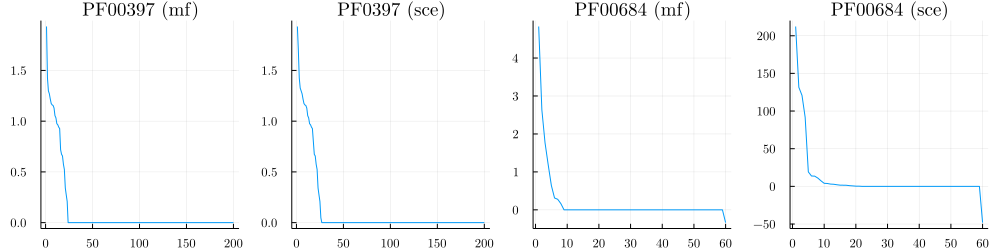

In [44]:
plot(p1, p2, p3, p4, size = (1000, 250), layout = (1,4))

In [45]:
savefig("seqs_decodings.pdf")

# 3. Viterbi Sampling

In [60]:
namefile = "../data_Viterbi_sampling/Viterbi_sampling_13857.txt"
data_vitsamp = readdlm(namefile);

diffE = data_vitsamp[5,:]
Hdist = data_vitsamp[6,:];

p1 = plot(sort(diffE,rev=false), label="", title="E(sampled)-E(min)")
p2 = histogram(Hdist, bins = 100, normed = true, label="", title="Hamming distance");

In [61]:
namefile = "../data_Viterbi_sampling/Viterbi_sampling_48127.txt"
data_vitsamp = readdlm(namefile);

diffE = data_vitsamp[5,:]
Hdist = data_vitsamp[6,:];

plot!(p1, sort(diffE,rev=false), label="")
histogram!(p2, Hdist, bins = 100, normed = true, label="");

In [62]:
namefile = "../data_Viterbi_sampling/Viterbi_sampling_34358.txt"
data_vitsamp = readdlm(namefile);

diffE = data_vitsamp[5,:]
Hdist = data_vitsamp[6,:];

plot!(p1, sort(diffE,rev=false), label="")
histogram!(p2, Hdist, bins = 100, normed = true, label="");

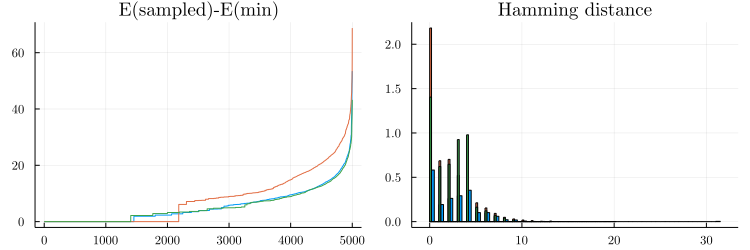

In [64]:
plot(p1, p2, size = (750, 250), layout = (1,2))

In [65]:
savefig("viterbi_sampling.pdf")